In [ ]:
!pip install seaborn
!pip install matplotlib
!pip install scipy

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("paris_average_no2.csv", encoding="utf-8")

df.head(10)

,date,city,avg_NO2
0,2020-11-25,Paris,36.22
1,2020-11-26,Paris,47.38
2,2020-11-27,Paris,33.40
3,2020-11-28,Paris,37.32
4,2020-11-29,Paris,41.37
5,2020-11-30,Paris,57.55
6,2020-12-01,Paris,29.60
7,2020-12-02,Paris,41.64
8,2020-12-03,Paris,21.61
9,2020-12-04,Paris,22.87


Determine N02 normality using histograms

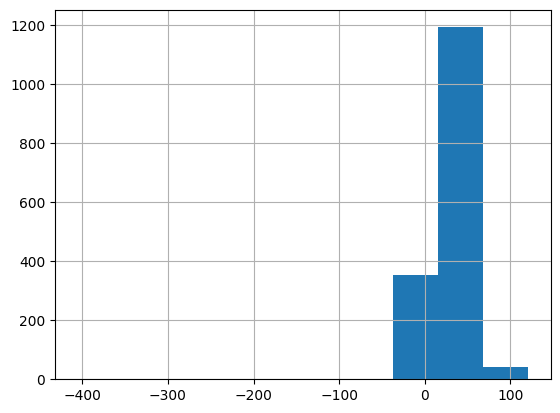

<Figure size 640x480 with 0 Axes>

In [ ]:
df["avg_NO2"].hist()
plt.show()
plt.clf()

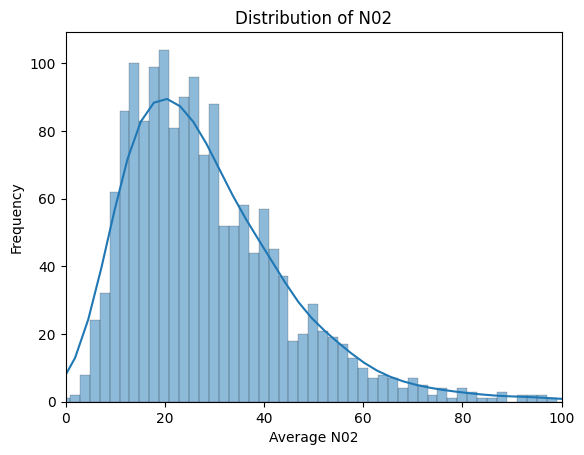

In [27]:
bin_edges = np.arange(0, 110, 10)


sns.histplot(df["avg_NO2"], kde=True, bins=bin_edges, binwidth=2)
plt.xlim(0, 100)
plt.title("Distribution of N02")
plt.xlabel("Average N02")
plt.ylabel("Frequency")
plt.show()

Average N02 data is not normally distributed graphically, use shapiro from scipy to validate data distribution again


In [30]:
from scipy.stats import shapiro

stat, p = shapiro(df["avg_NO2"].dropna())
print("Shapiro-Wilk Test p-value:", p)

if p > 0.05:
    print("✅ Data is normally distributed")
else:
    print("❌ Data is NOT normally distributed")

Shapiro-Wilk Test p-value: 3.2332184652725346e-51
❌ Data is NOT normally distributed


Average NO2 is not normally distributed, so use Wilcoxon-Mann-Whitney test of two groups(weekends and weekdays)

In [ ]:
# Split data into two groups weekends and weekdays

df["date"] = pd.to_datetime(df["date"])

df["day_of_week"] = df["date"].dt.weekday

weekdays = df[(df["day_of_week"] <= 4)]

weekdays

weekends = df[df["day_of_week"] > 4]

In [50]:
from scipy.stats import mannwhitneyu

results = mannwhitneyu(
    x=weekdays["avg_NO2"].to_numpy(),
    y=weekends["avg_NO2"].to_numpy(),
    alternative="greater",
)

results

p_val = results.pvalue


# Determine hypothesis test result using significant level
if p_val <= 0.05:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}

result_dict

{'p_val': np.float64(2.0652570877048054e-11), 'result': 'reject'}